In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# 1C Sales History EDA

In [3]:
sales_history_df = pd.read_csv('../data/sales_train.csv')

items_df = pd.read_csv('../data/items.csv')
shops_df = pd.read_csv('../data/shops.csv')
item_categories_df = pd.read_csv('../data/item_categories.csv')

In [4]:
sales_history_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.00
1,03.01.2013,0,25,2552,899.00,1.00
2,05.01.2013,0,25,2552,899.00,-1.00
3,06.01.2013,0,25,2554,"1,709.05",1.00
4,15.01.2013,0,25,2555,"1,099.00",1.00


In [5]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [94]:
shops_df

,shop_name,shop_id,location
0,"!Якутск Орджоникидзе, 56 фран",0,Якутск
1,"!Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
6,"Воронеж (Плехановская, 13)",6,Воронеж
7,"Воронеж ТРЦ ""Максимир""",7,Воронеж
8,"Воронеж ТРЦ Сити-Парк ""Град""",8,Воронеж
9,Выездная Торговля,9,Выездная


In [7]:
item_categories_df.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


## Deduplication

In [ ]:
shops_df.loc[shops_df['shop_name'].isin(['Якутск Орджоникидзе, 56', '!Якутск Орджоникидзе, 56 фран']), 'shop_name'] = 'Якутск Орджоникидзе, 56'
shops_df.loc[shops_df['shop_name'].isin(['Якутск ТЦ "Центральный"', '!Якутск ТЦ "Центральный" фран']), 'shop_name'] = 'Якутск ТЦ "Центральный"'

shops_df.loc[shops_df['shop_name'].isin(['Жуковский ул. Чкалова 39м?', 'Жуковский ул. Чкалова 39м²']), 'shop_name'] = 'Жуковский ул. Чкалова 39м²'

## Dataset Preprocessing

In [8]:
shops_df['location'] = shops_df['shop_name'].map(lambda shop_name: shop_name.split(' ')[0].strip('!'))

shops_df['location'].unique()

array(['Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
       'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
       'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
       'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
       'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
       'Ярославль'], dtype=object)

In [9]:
item_categories_df['main_category_name'] = item_categories_df['item_category_name'].map(lambda category_name: category_name.split(' - ')[0])

item_categories_df.loc[item_categories_df['main_category_name'].isin(['Игры Android', 'Игры MAC', 'Игры PC']), 'main_category_name'] = 'Игры'
item_categories_df.loc[item_categories_df['main_category_name'].isin(['Чистые носители (шпиль)', 'Чистые носители (штучные)']), 'main_category_name'] = 'Чистые носители'
item_categories_df.loc[item_categories_df['main_category_name'] == 'Карты оплаты (Кино, Музыка, Игры)', 'main_category_name'] = 'Карты оплаты'

item_categories_df['main_category_name'].unique()

array(['PC', 'Аксессуары', 'Билеты (Цифра)', 'Доставка товара',
       'Игровые консоли', 'Игры', 'Карты оплаты', 'Кино', 'Книги',
       'Музыка', 'Подарки', 'Программы', 'Служебные', 'Чистые носители',
       'Элементы питания'], dtype=object)

In [10]:
item_categories_df['item_category_name'].unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

In [11]:
item_categories_df['sub_category_name'] = item_categories_df['item_category_name'].str.split(' - ').map(lambda category_parts: category_parts[1] if len(category_parts) > 1 else category_parts[0])

item_categories_df['sub_category_name'].unique()

array(['Гарнитуры/Наушники', 'PS2', 'PS3', 'PS4', 'PSP', 'PSVita',
       'XBOX 360', 'XBOX ONE', 'Билеты (Цифра)', 'Доставка товара',
       'Прочие', 'Аксессуары для игр', 'Цифра', 'Дополнительные издания',
       'Коллекционные издания', 'Стандартные издания',
       'Карты оплаты (Кино, Музыка, Игры)', 'Live!', 'Live! (Цифра)',
       'PSN', 'Windows (Цифра)', 'Blu-Ray', 'Blu-Ray 3D', 'Blu-Ray 4K',
       'DVD', 'Коллекционное', 'Артбуки, энциклопедии', 'Аудиокниги',
       'Аудиокниги (Цифра)', 'Аудиокниги 1С', 'Бизнес литература',
       'Комиксы, манга', 'Компьютерная литература',
       'Методические материалы 1С', 'Открытки',
       'Познавательная литература', 'Путеводители',
       'Художественная литература', 'CD локального производства',
       'CD фирменного производства', 'MP3', 'Винил', 'Музыкальное видео',
       'Подарочные издания', 'Атрибутика', 'Гаджеты, роботы, спорт',
       'Мягкие игрушки', 'Настольные игры',
       'Настольные игры (компактные)', 'Открытки, на

In [12]:
full_sales_history_df = pd.merge(sales_history_df, items_df, on='item_id')
full_sales_history_df = pd.merge(full_sales_history_df, shops_df, on='shop_id')
full_sales_history_df = pd.merge(full_sales_history_df, item_categories_df, on='item_category_id')

In [13]:
full_sales_history_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,location,item_category_name,main_category_name,sub_category_name
0,02.01.2013,0,59,22154,999.00,1.00,ЯВЛЕНИЕ 2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино,Blu-Ray
1,26.04.2013,3,59,944,150.00,1.00,2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино,Blu-Ray
2,26.06.2013,5,59,944,199.50,1.00,2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино,Blu-Ray
3,20.07.2013,6,59,944,199.50,1.00,2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино,Blu-Ray
4,14.09.2013,8,59,944,299.00,2.00,2012 (BD),37,"Ярославль ТЦ ""Альтаир""",Ярославль,Кино - Blu-Ray,Кино,Blu-Ray


## Shop Number by Location

In [28]:
shop_total_prodif_df = shops_df.groupby(['location'], as_index=True)['shop_name'].count().sort_values(ascending=False)

fig = px.bar(
    x=shop_total_prodif_df.index, 
    y=shop_total_prodif_df.values,
    width=800, height=800,
    title='Shop Number By Location',
)

fig.show()

## Purchase Frequency

In [25]:
shop_total_prodif_df = full_sales_history_df.groupby('shop_name', as_index=True)['shop_name'].count().sort_values(ascending=False)

fig = px.bar(
    x=shop_total_prodif_df.index, 
    y=shop_total_prodif_df.values,
    width=800, height=800,
    title='Purchase Frequence by Shop',
)

fig.show()

## Profit Distribution

In [14]:
full_sales_history_df['total_price'] = full_sales_history_df['item_price'] * full_sales_history_df['item_cnt_day']

In [23]:
shop_total_prodif_df = full_sales_history_df.groupby('shop_name', as_index=True)['total_price'].sum().sort_values(ascending=False)

fig = px.bar(
    x=shop_total_prodif_df.index, 
    y=shop_total_prodif_df.values,
    width=800, height=800,
    title='Total Shop Profit',
)

fig.show()

In [24]:
shop_total_prodif_df = full_sales_history_df.groupby('location', as_index=True)['total_price'].sum().sort_values(ascending=False)

fig = px.bar(
    x=shop_total_prodif_df.index, 
    y=shop_total_prodif_df.values,
    width=800, height=800,
    title='Total Profit by Location',
)

fig.show()

## Item Sales

In [36]:
item_total_profit_df = full_sales_history_df.groupby('item_name', as_index=True)['total_price'].sum().sort_values(ascending=False)

top20_most_profit_items_df = item_total_profit_df.head(20)

fig = px.bar(
    x=top20_most_profit_items_df.index, 
    y=top20_most_profit_items_df.values,
    width=800, height=1000,
    title='Top 20 Items that Brought Most of the Profit',
)

fig.show()

In [39]:
top20_least_profit_items_df = item_total_profit_df.tail(20)

fig = px.bar(
    x=top20_least_profit_items_df.index, 
    y=top20_least_profit_items_df.values,
    width=800, height=1000,
    title='Top 20 Items that Brought Least of the Profit',
)

fig.show()

In [45]:
item_sale_frequency_df = full_sales_history_df.groupby('item_name', as_index=True)['item_id'].count().sort_values(ascending=False)

top20_item_sale_frequency_df = item_sale_frequency_df.head(20)

fig = px.bar(
    x=top20_item_sale_frequency_df.index, 
    y=top20_item_sale_frequency_df.values,
    width=800, height=1000,
    title='Top 20 Most Frequently Sold Items',
)

fig.show()

In [46]:
least20_item_sale_frequency_df = item_sale_frequency_df.tail(20)

fig = px.bar(
    x=least20_item_sale_frequency_df.index, 
    y=least20_item_sale_frequency_df.values,
    width=800, height=1000,
    title='Top 20 Least Frequently Sold Items',
)

fig.show()

## Category Profit Distrubution

In [55]:
most_profitable_categories_df = full_sales_history_df.groupby('item_category_name', as_index=True)['total_price'].sum().sort_values(ascending=False)

fig = px.bar(
    x=most_profitable_categories_df.index, 
    y=most_profitable_categories_df.values,
    width=1000, height=1000,
    title='Top 20 Most Profitable Categories',
)

fig.show()

In [49]:
most_profitable_categories_df = full_sales_history_df.groupby('main_category_name', as_index=True)['total_price'].sum().sort_values(ascending=False)

fig = px.bar(
    x=most_profitable_categories_df.index, 
    y=most_profitable_categories_df.values,
    width=800, height=1000,
    title='Top 20 Most Profitable Categories',
)

fig.show()

In [52]:
most_profitable_categories_df = most_profitable_categories_df.tail(4)

fig = px.bar(
    x=most_profitable_categories_df.index, 
    y=most_profitable_categories_df.values,
    width=800, height=400,
    title='5 Least Profitable Categories',
)

fig.show()

## Monthly Statistics

In [57]:
monthly_profit_df = full_sales_history_df.groupby('date_block_num')['total_price'].sum()

fig = px.line(x=monthly_profit_df.index, y=monthly_profit_df.values, title='Monthly Total Profit')
fig.show()

In [58]:
monthly_sale_frequency_df = full_sales_history_df.groupby('date_block_num')['total_price'].count()

fig = px.line(x=monthly_sale_frequency_df.index, y=monthly_sale_frequency_df.values, title='Monthly Sale Frequency')
fig.show()

## Moving Average

In [67]:
smoothed_monthly_sale_profit_df = monthly_profit_df.rolling(window=12).mean()

fig = px.line(x=smoothed_monthly_sale_profit_df.index, y=smoothed_monthly_sale_profit_df.values, title='Mean Smoothed Monthly Sale Frequency')
fig.show()

In [66]:
smoothed_monthly_sale_frequency_df = monthly_sale_frequency_df.rolling(window=12).mean()

fig = px.line(x=smoothed_monthly_sale_frequency_df.index, y=smoothed_monthly_sale_frequency_df.values, title='Mean Smoothed Monthly Sale Frequency')
fig.show()

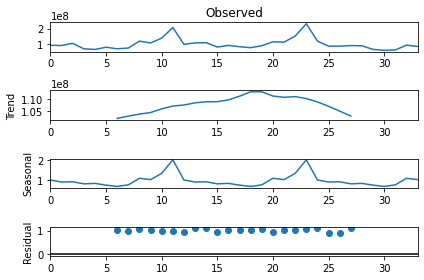

In [90]:
import statsmodels.api as sm

statsmodels.tsa.seasonal.seasonal_decompose(monthly_profit_df.values, period=12, model='multiplicative').plot();

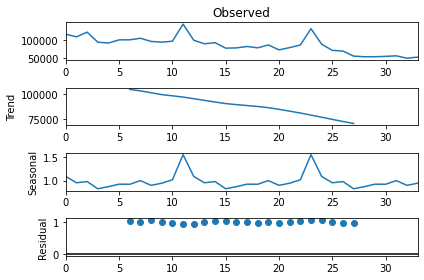

In [92]:
statsmodels.tsa.seasonal.seasonal_decompose(monthly_sale_frequency_df.values, period=12, model='multiplicative').plot();